In [ ]:
# Run algorithms with Israel data

In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import pandas as pd
from os import listdir
pd.options.display.float_format = '{:.4f}'.format
from geopy import distance
from geopy import Point
import geopandas
import shapely
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import auc
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'geopandas'

In [3]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
!pip install info_gain
from info_gain import info_gain
from sklearn.feature_selection import mutual_info_classif

In [4]:
# algorithm to search for the best feature set for C4.5 algorithm

def forwardSearch(feats, x_train, y_train, x_test, y_test, number_features):
    fset = []
    potential_feats = feats.copy()
    column_names = ['feature', 'auc']  
    while(len(fset)<number_features):
        feature_scores = pd.DataFrame(columns = column_names)
        feature_scores['feature'] = potential_feats
        feature_scores['auc'] = 0
        feature_scores.set_index('feature', inplace=True)   
        for f in potential_feats:
            test_fset = fset.copy()
            test_fset.append(f)
            #print("test_fset: ", test_fset)
            feature_scores.loc[f] = runC45(test_fset, x_train, y_train, x_test, y_test)         
        #print('feature_scores: ', feature_scores)
        my_max = feature_scores[feature_scores['auc']==feature_scores['auc'].max()].index
        fset.append(my_max.tolist()[0])
        potential_feats.remove(my_max.tolist()[0])
        print("fset: ", fset, "auc: ", feature_scores['auc'].max())
    return

In [5]:
# read Israel earthquake data with all features defined train test and val
data_dir = "C:\\Users\\User\\Debbie\\Data\\"
file_path = data_dir + "final_feature_data_used\\israel_train.csv"
fileToRead = open(file_path, mode='r')
ca_train = pd.read_csv(fileToRead)
fileToRead.close()
file_path = data_dir + "final_feature_data_used\\israel_val.csv"
fileToRead = open(file_path, mode='r')
ca_val = pd.read_csv(fileToRead)
fileToRead.close()
file_path = data_dir + "final_feature_data_used\\israel_test.csv"
fileToRead = open(file_path, mode='r')
ca_test = pd.read_csv(fileToRead)
fileToRead.close()

In [6]:
# all the variables
x_train = ca_train.drop(['actual','mag_counts','region','year'], axis=1)
y_train = ca_train['actual']
x_test = ca_test.drop(['actual','mag_counts','region','year'], axis=1)
y_test = ca_test['actual']
x_val = ca_val.drop(['actual','mag_counts','region','year'], axis=1)
y_val = ca_val['actual']

In [7]:
x_train_val = x_train.append(x_val)
y_train_val = y_train.append(y_val)
y_train_val

0     1
1     1
2     1
3     0
4     0
     ..
33    0
34    1
35    0
36    0
37    1
Name: actual, Length: 194, dtype: int64

In [8]:
len(x_train_val)

194

In [9]:
x_train_val

,tn,meanMag,rateE,b,mse,deltaM,ma1,ma2,ma3,ma4,...,l1_mag_med,l2_mag_med,l3_mag_med,l4_mag_med,l5_mag_med,l6_mag_med,l7_mag_med,l8_mag_med,l9_mag_med,l10_mag_med
0,3243,2.9980,4696738.7230,-0.4333,0.0038,6.0265,5,3.0000,3.0000,3.5000,...,2.7000,2.9000,2.5000,2.3000,2.4000,2.7000,3.8000,3.2000,2.9000,3.7000
1,1856,2.9420,7393716.9650,-0.4683,0.0023,5.7312,29,17.0000,11.6667,9.5000,...,2.7000,2.7000,2.9000,2.5000,2.3000,2.4000,2.7000,3.8000,3.2000,2.9000
2,947,2.9520,111345625.9000,-0.4231,0.0123,6.0236,12,20.5000,15.3333,11.7500,...,2.8000,2.7000,2.7000,2.9000,2.5000,2.3000,2.4000,2.7000,3.8000,3.2000
3,439,2.7820,10326463.7300,-0.5679,0.0049,5.0911,25,18.5000,22.0000,17.7500,...,2.6000,2.8000,2.7000,2.7000,2.9000,2.5000,2.3000,2.4000,2.7000,3.8000
4,557,2.6360,6354397.8490,-0.6409,0.0034,4.6878,42,33.5000,26.3333,27.0000,...,2.5000,2.6000,2.8000,2.7000,2.7000,2.9000,2.5000,2.3000,2.4000,2.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2516,2.5260,1457924.2520,-0.6544,0.0041,4.5376,10,7.0000,7.3333,6.7500,...,2.3000,2.2500,2.5000,2.1000,2.2000,2.2000,2.7000,2.5000,2.4000,2.8000
34,3485,2.7060,1914342.7050,-0.5446,0.0012,5.1023,4,5.5000,5.0000,6.7500,...,2.8000,2.3000,2.7000,2.4000,2.9000,2.2000,2.0000,3.1000,2.4000,2.9000
35,5706,2.7320,700831.7810,-0.6318,0.0078,4.8016,1,1.0000,1.0000,1.2500,...,4.0000,2.4000,2.1000,2.3000,2.5000,2.9000,0.0000,2.3000,2.4000,2.2000
36,5784,3.1200,1564327.5250,-0.5255,0.0120,5.6010,0,0.5000,0.6667,1.5000,...,0.0000,4.1000,2.3000,3.0000,2.1000,2.8500,0.0000,0.0000,3.3000,3.0000


In [10]:
# using rapidminer I got the following results for Israel data IGR above 0.8 (27):
igr_feats = ['rateE','x7','b','deltaM','x6_3','x6_7','ma4','ma7','x6_8'
             ,'x6_9','x6_10','run25below_all','l1_mag_med','prob4','mse',
             'prob1','x6_1' ,'x6_2','x6_4','x6_5','x6_6','count_above25_all',
             'per_above_mean25_all','x1','x5','run25_below','l1_mag_mean']

In [11]:
marks_vars = ['b', 'ma1', 'prob1', 'ma2', 'prob2', 'ma3',
       'prob3', 'ma4', 'prob4', 'ma5', 'prob5', 'ma6', 'prob6', 'ma7', 'prob7',
       'ma8', 'prob8', 'ma9', 'prob9', 'ma10', 'prob10', 'tn', 'meanMag',
       'rateE', 'mse', 'deltaM']

In [12]:
feats = x_train.columns.to_list()
len(feats)

82

In [13]:
# C4.5 algorithm 

In [14]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [15]:
model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
# run c45 model and get auc to use in search 
def runC45(feat, x_train, y_train, x_test, y_test):   
    c45 = model.fit(x_train[feat], y_train)
    return roc_auc_score(y_test, c45.predict_proba(x_test[feat])[:,1])

In [16]:
model = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=10)

# Routine to just to run c45 and get results
def myC45(feat, x_train, y_train, x_test, y_test):

    c45 = model.fit(x_train[feat], y_train)
    ca_predict = c45.predict(x_test[feat])
    ca_predictions = c45.predict_proba(x_test[feat])
    print('accuracy: ', accuracy_score(y_test, ca_predict), 'auc: ', roc_auc_score(y_test, ca_predictions[:,1]))
    print(pd.DataFrame(
        confusion_matrix(y_test, ca_predict),
        columns=['Predicted Not Earthquake', 'Predicted Earthquake'],
        index=['True Not Earthquake', 'True Earthquake'])
    )
    fpr, tpr, _ = roc_curve(y_test, ca_predictions[:,1])
    plt.clf()
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

In [17]:
# Run C45 on all variables
feats = x_train.columns.tolist()
print('# of features:', len(feats))

# of features: 82


In [18]:
# run search starting with all of the variables
forwardSearch(feats, x_train, y_train, x_val, y_val, 8)

fset:  ['prob1'] auc:  0.706845238095238
fset:  ['prob1', 'x6_7'] auc:  0.8035714285714286
fset:  ['prob1', 'x6_7', 'count_above50_all'] auc:  0.8273809523809523
fset:  ['prob1', 'x6_7', 'count_above50_all', 'run25_below'] auc:  0.8586309523809524
fset:  ['prob1', 'x6_7', 'count_above50_all', 'run25_below', 'x6_6'] auc:  0.8601190476190477
fset:  ['prob1', 'x6_7', 'count_above50_all', 'run25_below', 'x6_6', 'ma5'] auc:  0.8601190476190477
fset:  ['prob1', 'x6_7', 'count_above50_all', 'run25_below', 'x6_6', 'ma5', 'per_above_mean50'] auc:  0.8630952380952381
fset:  ['prob1', 'x6_7', 'count_above50_all', 'run25_below', 'x6_6', 'ma5', 'per_above_mean50', 'run25all'] auc:  0.8660714285714286


In [19]:
['prob1', 'x7', 'prob5', 'prob9', 'run75all', 'run25below_all'] auc:  0.897
['prob1', 'x7', 'run50all', 'run75below_all', 'run25all', 'prob10'] auc:  0.895
['prob1', 'x7', 'prob5', 'prob9', 'run75all'] auc:  0.894
['prob1', 'count_above50_all', 'x7', 'x6_2', 'run25', 'l9_mag_med'] auc:  0.873
['prob1', 'x6_7', 'per_above_mean50_all', 'ma10', 'l9_mag_med', 'ma3'] auc:  0.872
['prob1', 'x7', 'prob8', 'x6_9'] auc:  0.866
['prob1', 'count_above50_all', 'x7', 'x6_2'] auc:  0.8616
['prob1', 'x6_7', 'count_above50_all', 'run25_below', 'x6_6'] auc:  0.860
['prob1', 'x6_7', 'per_above_mean50_all', 'x7', 'l9_mag_med', 'count_above50_all'] auc:  0.860

SyntaxError: invalid syntax (<ipython-input-19-3d02473471ce>, line 1)

In [20]:
# result from previously
c45all_feats = ['prob1', 'x7', 'prob5','l7_mag_med','l5_mag_med']

accuracy:  0.8157894736842105 auc:  0.84375
                     Predicted Not Earthquake  Predicted Earthquake
True Not Earthquake                        23                     1
True Earthquake                             6                     8


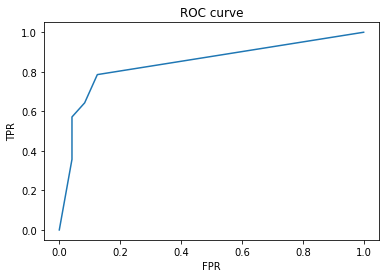

In [21]:
myC45(c45all_feats, x_train, y_train, x_val, y_val)

In [22]:
# run c45 search on igr rapidminer features:
forwardSearch(igr_feats, x_train, y_train, x_val, y_val, 8)

fset:  ['prob1'] auc:  0.706845238095238
fset:  ['prob1', 'x7'] auc:  0.7857142857142858
fset:  ['prob1', 'x7', 'b'] auc:  0.787202380952381
fset:  ['prob1', 'x7', 'b', 'mse'] auc:  0.8318452380952381
fset:  ['prob1', 'x7', 'b', 'mse', 'ma4'] auc:  0.8482142857142857
fset:  ['prob1', 'x7', 'b', 'mse', 'ma4', 'x6_1'] auc:  0.8511904761904762
fset:  ['prob1', 'x7', 'b', 'mse', 'ma4', 'x6_1', 'count_above25_all'] auc:  0.8511904761904762
fset:  ['prob1', 'x7', 'b', 'mse', 'ma4', 'x6_1', 'count_above25_all', 'x6_8'] auc:  0.8511904761904762
